In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project data set/postings.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Project data set/skills.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Project data set/job_skills.csv')

In [4]:
#view data
df.head(2)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0


In [5]:
#convert listed_date to datetime
df['original_listed_time'] = pd.to_datetime(df['original_listed_time'], unit='ms')

In [6]:
#confirm min and max date
print(df['original_listed_time'].min(), df['original_listed_time'].max())

2023-12-05 21:08:53 2024-04-20 00:26:43


In [7]:
#extract year month and period columns
df['year'] = df['original_listed_time'].dt.year
df['month'] = df['original_listed_time'].dt.month
df['year_month'] = df['original_listed_time'].dt.to_period('M')

**Preprocessing Time Information**

**REMOTE JOBS TREND OVER TIME**

In [8]:
# check column exists
print(df['remote_allowed'].value_counts(dropna=False))

remote_allowed
NaN    108603
1.0     15246
Name: count, dtype: int64


In [9]:
#Remote satus labelling
df['remote_status'] = df['remote_allowed'].apply(
    lambda x: 'Remote' if pd.isna(x) else 'Not-Remote')

In [10]:
print(df['remote_status'].value_counts())

remote_status
Remote        108603
Not-Remote     15246
Name: count, dtype: int64


In [11]:
#Group by month and remote status
df_2024 = df[df['year_month'].astype(str).str.startswith('2024')]
remote_counts = df_2024.groupby(['year_month', 'remote_status']).size().unstack(fill_value=0)
remote_counts['total'] = remote_counts.sum(axis=1)
remote_counts['Remote %'] = (remote_counts.get('Remote', 0) / remote_counts['total'] * 100).round(2)
print(remote_counts[['Remote', 'Not-Remote', 'Remote %']])

remote_status  Remote  Not-Remote  Remote %
year_month                                 
2024-01             5           2     71.43
2024-02             7           2     77.78
2024-03          1600         215     88.15
2024-04        106988       15027     87.68


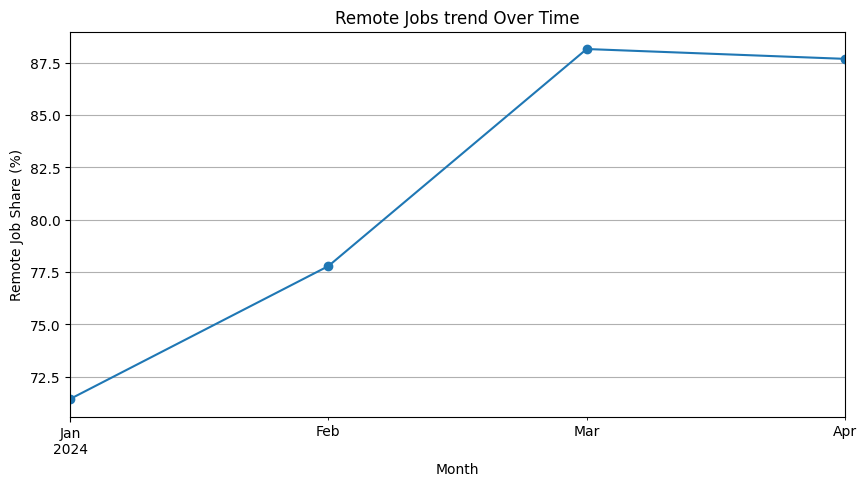

In [12]:
#A graph visualisation
remote_counts['Remote %'].plot(marker='o', figsize=(10, 5), title='Remote Jobs trend Over Time')
plt.ylabel("Remote Job Share (%)")
plt.xlabel("Month")
plt.grid(True)
plt.show()

In [13]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips', 'year',
       'month', 'year_month', 'remote_status'],
      dtype='object')

**SALARY TREND OVER TIME**

In [14]:
# Group by month and calculate mean salary
salary_trends = df_2024.groupby('year_month')['normalized_salary'].median().reset_index()
salary_trends['year_month'] = salary_trends['year_month'].dt.to_timestamp()

print(salary_trends.to_string(index=False))

year_month  normalized_salary
2024-01-01           201200.0
2024-02-01            72000.0
2024-03-01           105000.0
2024-04-01            81000.0


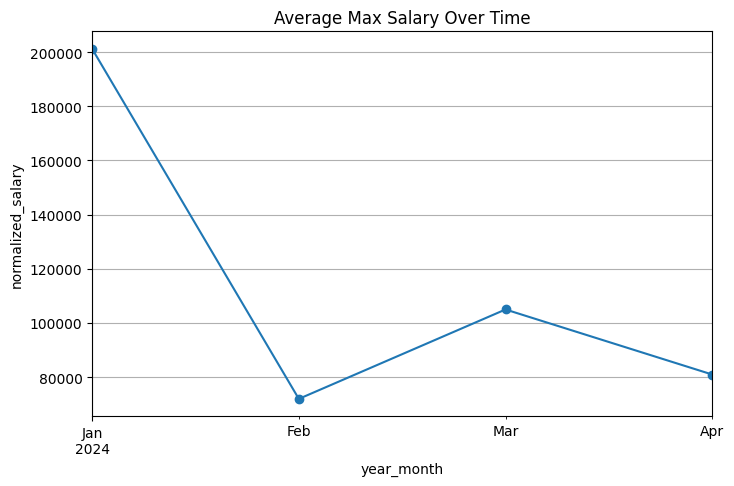

In [15]:
#Graphical representation

salary_trends = salary_trends.set_index('year_month')

# Plot
salary_trends['normalized_salary'].plot(marker='o', figsize=(8,5), title='Average Max Salary Over Time')
plt.ylabel("normalized_salary")
plt.xlabel("year_month")
plt.grid(True)
plt.show()

**SKILLS TREND OVER TIME**

In [16]:
df2.head(2)

,skill_abr,skill_name
0,ART,Art/Creative
1,DSGN,Design


In [17]:
df3.head(2)

,job_id,skill_abr
0,3884428798,MRKT
1,3884428798,PR


In [21]:
# Merge to get listed_time
skills_record = df.merge(df3, on='job_id', how='left')\
                          .merge(df2, on='skill_abr', how='left')

In [22]:
skills_record.head(2)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,compensation_type,normalized_salary,zip_code,fips,year,month,year_month,remote_status,skill_abr,skill_name
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,BASE_SALARY,38480.0,8540.0,34021.0,2024,4,2024-04,Remote,MRKT,Marketing
1,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,BASE_SALARY,38480.0,8540.0,34021.0,2024,4,2024-04,Remote,SALE,Sales


In [20]:
print(skills_record.columns)

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips', 'year',
       'month', 'year_month', 'remote_status', 'skill_abr', 'skill_name'],
      dtype='object')


In [42]:
# Only keep rows where both month and skill_name are present
skills_df = skills_record[['year_month', 'skill_name']].dropna()

# view unique months
print(skills_df['year_month'].unique())

<PeriodArray>
['2024-04', '2024-03', '2023-12', '2024-01', '2024-02']
Length: 5, dtype: period[M]


In [43]:
# Count occurrences of each skill per month
skill_counts = skills_df.groupby(['year_month', 'skill_name']).size().reset_index(name='count')

# Sort by month
skill_counts = skill_counts.sort_values('year_month')

In [44]:
# Create pivot table: rows = month, columns = skills, values = counts
skill_pivot = skill_counts.pivot(index='year_month', columns='skill_name', values='count').fillna(0)

# Ensure months are sorted
skill_pivot = skill_pivot.sort_index()

In [45]:
# Find top 5 most frequent skills overall
top_skills = skill_pivot.sum().sort_values(ascending=False).head(5).index

# Keep only those top skills
top_skill_trends = skill_pivot[top_skills]

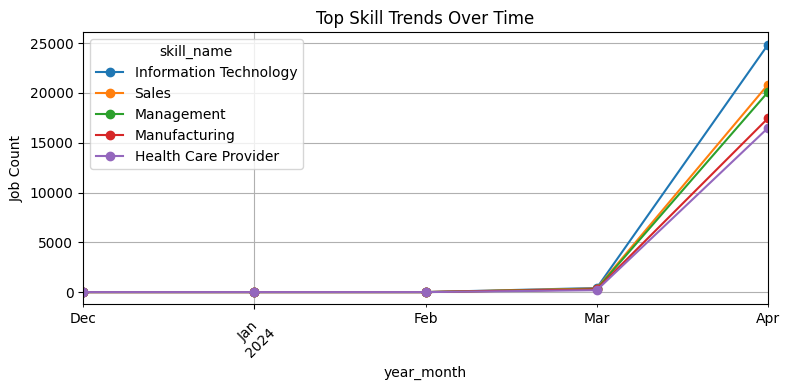

In [46]:
import matplotlib.pyplot as plt

# Plot the top skill trends
top_skill_trends.plot(marker='o', figsize=(8, 4), title="Top Skill Trends Over Time")
plt.xlabel("year_month")
plt.ylabel("Job Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Save data
top_skill_trends.to_csv("top_skill_trends_over_time.csv")